In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

from sklearn.svm import SVR

df = pd.read_csv("Crops.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [2]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [3]:
df['label'] = df['label'].replace({'rice':1, 'maize':2, 'chickpea':3, 'kidneybeans':4, 'pigeonpeas':5, 'mothbeans':6, 'mungbean':7, 'blackgram':8, 'lentil':9, 'pomegranate':10, 'banana':11, 'mango':12, 'grapes':13, 'watermelon':14, 'muskmelon':15, 'apple':16, 'orange':17, 'papaya':18, 'coconut':19, 'cotton':20, 'jute':21, 'coffee':22})

C:\Users\caleb\AppData\Local\Temp\ipykernel_52504\3528421059.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['label'] = df['label'].replace({'rice':1, 'maize':2, 'chickpea':3, 'kidneybeans':4, 'pigeonpeas':5, 'mothbeans':6, 'mungbean':7, 'blackgram':8, 'lentil':9, 'pomegranate':10, 'banana':11, 'mango':12, 'grapes':13, 'watermelon':14, 'muskmelon':15, 'apple':16, 'orange':17, 'papaya':18, 'coconut':19, 'cotton':20, 'jute':21, 'coffee':22})


In [4]:
X = df.drop(['label'], axis = 1)
y = df['label']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1760, 7), (1760,), (440, 7), (440,))

In [13]:
y_test = np.array(y_test).reshape(-1,1)

In [15]:
y_test.shape

(440, 1)

In [17]:
y_train = np.array(y_train).reshape(-1,1)
y_train.shape

(1760, 1)

In [21]:
from sklearn.preprocessing import StandardScaler

X_sc = StandardScaler()
y_sc = StandardScaler()
X_train = X_sc.fit_transform(X_train)
y_train = y_sc.fit_transform(y_train)

In [42]:
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)

E:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [27]:
y_pred = svr.predict(X_sc.transform(X_test))
y_pred = y_pred.reshape(-1,1)
y_pred = y_sc.inverse_transform(y_pred)

In [29]:
y_pred

array([[ 1.53626059e+01],
       [ 1.31080137e+01],
       [ 1.24801815e+01],
       [ 2.77090915e+00],
       [ 8.11529260e+00],
       [ 1.77274261e+01],
       [ 6.75149943e+00],
       [ 3.67535665e+00],
       [ 1.52473440e+01],
       [ 1.08955857e+01],
       [ 5.57761914e+00],
       [ 1.98489747e+01],
       [ 6.43824348e+00],
       [ 7.92868167e+00],
       [ 1.22298525e+01],
       [ 1.60164928e+01],
       [ 2.32088011e+01],
       [ 5.67662161e+00],
       [ 2.19176709e+01],
       [ 1.21089513e+01],
       [ 1.90706359e+01],
       [ 8.77450482e+00],
       [ 5.07190161e+00],
       [ 1.95989346e+01],
       [ 2.12223679e+01],
       [ 2.33247712e+01],
       [ 9.10349205e+00],
       [ 1.57385829e+01],
       [ 6.27158035e+00],
       [ 4.58843432e+00],
       [ 1.25678302e+01],
       [ 4.45583811e+00],
       [ 5.30039149e+00],
       [ 1.56306570e+01],
       [ 1.84949561e+01],
       [ 1.88155675e+01],
       [ 1.24560014e+01],
       [ 1.26805251e+01],
       [ 1.3

In [31]:
f = pd.DataFrame({'Predicted value': y_pred.tolist(), 'Real Value': y_test.tolist()})
f

,Predicted value,Real Value
0,[15.36260587416286],[14]
1,[13.10801374461002],[14]
2,[12.480181539982755],[13]
3,[2.77090914777226],[3]
4,[8.115292596651685],[8]
...,...,...
435,[5.046711985355892],[5]
436,[11.088369618440014],[11]
437,[19.545828332235004],[20]
438,[8.367409590694972],[8]


In [37]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


print(r2)
print(mse)
print(mae)


0.800671042913423
8.025642751006703
1.3708190823338497


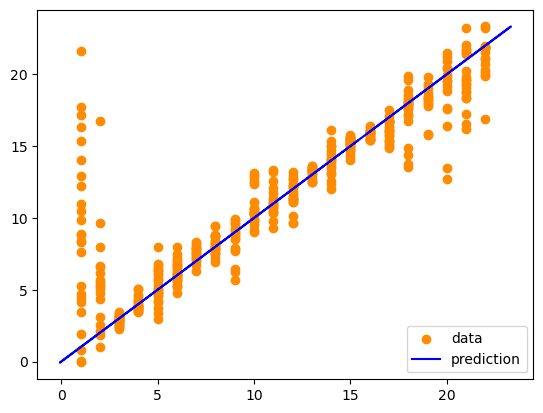

In [39]:
plt.scatter(y_test, y_pred, color = 'darkorange', label='data')
plt.plot(y_pred,y_pred, color='blue',label='prediction')
plt.legend()
plt.show()